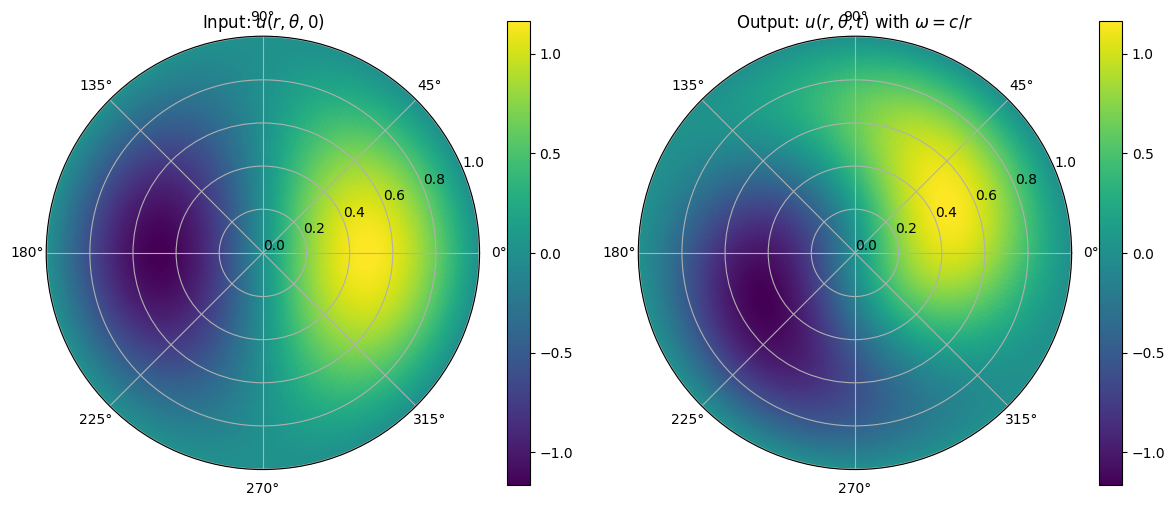

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

# Parameters
n = 1  # Bessel order
m = 1  # mode index
c = 1  # angular speed
alpha_n1 = jn_zeros(n, m)[-1]  # First zero of J_n

# Grid in polar coordinates
Nr = 200
Ntheta = 200
r = np.linspace(0, 1, Nr)
theta = np.linspace(0, 2 * np.pi, Ntheta)
R, Theta = np.meshgrid(r, theta, indexing='ij')

# Input: u(r, θ, 0) = 2 cos(θ) * J_n(α_{n,1} r)
u0 = 2 * np.cos(Theta) * jn(n, alpha_n1 * R)

# Output at time t: rotation due to angular velocity ω = c * r
t = 1.0  # time
Theta_rotated = Theta - c * R * t  # Angular shift
u_rotated = 2 * np.cos(Theta_rotated) * jn(n, alpha_n1 * R)

# Convert polar to Cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Plot input and output
fig, axs = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': 'polar'})

# Input
c0 = axs[0].pcolormesh(Theta, R, u0, shading='auto', cmap='viridis')
axs[0].set_title("Input: $u(r,\\theta,0)$")
fig.colorbar(c0, ax=axs[0], orientation='vertical')

# Output
c1 = axs[1].pcolormesh(Theta, R, u_rotated, shading='auto', cmap='viridis')
axs[1].set_title("Output: $u(r,\\theta,t)$ with $\\omega = c/r$")
fig.colorbar(c1, ax=axs[1], orientation='vertical')

plt.tight_layout()
plt.show()


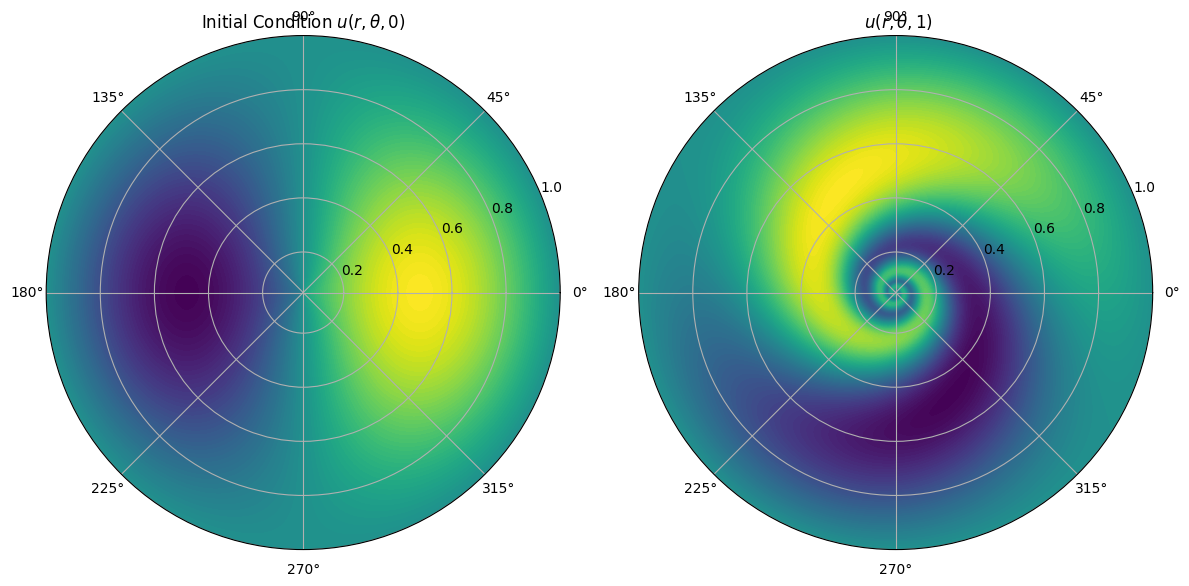

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

# Parameters
n = 1
alpha_n1 = jn_zeros(n, 1)[0]   # First zero of J_n
c = 1
t = 1.0

# Polar grid
Nr = 200
Ntheta = 200
r = np.linspace(0.05, 1, Nr)        # avoid r=0
theta = np.linspace(0, 2*np.pi, Ntheta)
R, Theta = np.meshgrid(r, theta)

# Initial condition u(r, theta, 0)
U0 = 2 * np.cos(Theta) * jn(n, alpha_n1 * R)

# Evolved condition u(r, theta, t)
Omega = c / R
U_t = 2 * np.cos(Theta - Omega * t) * jn(n, alpha_n1 * R)

# Convert to cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Plot
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12,6))
axs[0].contourf(Theta, R, U0, 100, cmap='viridis')
axs[0].set_title('Initial Condition $u(r, \\theta, 0)$')

axs[1].contourf(Theta, R, U_t, 100, cmap='viridis')
axs[1].set_title(' $u(r, \\theta, 1)$')

plt.tight_layout()
plt.show()